In [4]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np

iris = datasets.load_iris()

iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [5]:
x  =pd.DataFrame(iris.data)
x.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

y = pd.DataFrame(iris.target)
y.columns = ['Targets']
y



,Targets
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


The accuracy score of K-Mean:  0.24
The Confusion matrixof K-Mean:  [[ 0 50  0]
 [48  0  2]
 [14  0 36]]


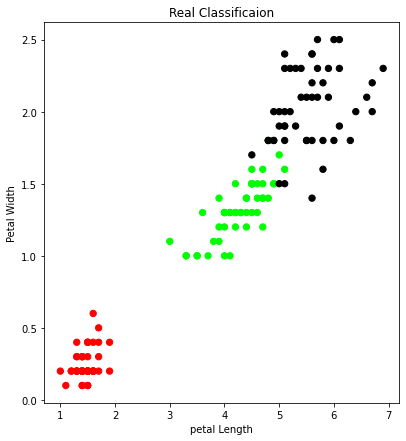

In [9]:
model = KMeans(n_clusters=3)
model.fit(x)

plt.figure(figsize = (14 ,7))

colormap = np.array(['red' , 'lime' , 'black'])
plt.subplot(1,2,1)
plt.scatter(x.Petal_Length , x.Petal_Width , c = colormap[y.Targets] , s=40)
plt.title('Real Classificaion')
plt.xlabel('petal Length')
plt.ylabel('Petal Width')

print('The accuracy score of K-Mean: ',sm.accuracy_score(y, model.labels_))
print('The Confusion matrixof K-Mean: ',sm.confusion_matrix(y, model.labels_))


The accuracy score of EM:  0.36666666666666664
The Confusion matrix of EM:  [[50  0  0]
 [ 0  5 45]
 [ 0 50  0]]


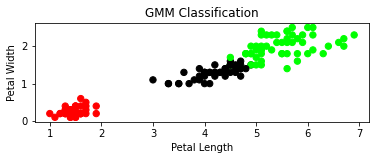

In [23]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(x)
xsa = scaler.transform(x)
xs = pd.DataFrame(xsa, columns = x.columns)
#xs.sample(5)

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)

y_gmm = gmm.predict(xs)
#y_cluster_gmm

plt.subplot(2, 1, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y_gmm], s=40)
plt.title('GMM Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

print('The accuracy score of EM: ',sm.accuracy_score(y, y_gmm))
print('The Confusion matrix of EM: ',sm.confusion_matrix(y, y_gmm))